In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

from src.simulate_time_series import run_kuramoto


In [ ]:
patient_numbers = [
    f.split(".")[0]
    for f in os.listdir("NetworkModelling/data/DTI/")
    if f.endswith(".xlsx")
]

total_list = []
for patient_number in patient_numbers:
    k_distance_array = np.load(f"output/k_shortest_paths/{patient_number}.npz")[
        "k_distance_array"
    ]
    k_distance_array[np.isnan(k_distance_array)] = 0

    patient_ts_file = pd.ExcelFile(f"NetworkModelling/data/fMRI/{patient_number}.xlsx")
    patient_ts = patient_ts_file.parse(sheet_name="Sheet1", header=None).to_numpy().T
    patient_fc = np.corrcoef(patient_ts)
    fc_triu = patient_fc[np.triu_indices(patient_fc.shape[0], k=1)]

    p_corrs = []
    for k in np.arange(50):
        k_triu = k_distance_array[:, :, k][np.triu_indices(patient_fc.shape[0], k=1)]
        p_corrs.append(sp.stats.pearsonr(k_triu, fc_triu)[0])

    # plt.scatter(np.arange(50), p_corrs, alpha = 0.2, color = 'black')
    total_list.append(p_corrs)

corr_array = np.array(total_list)
np.any(np.isnan(corr_array))

np.save("output/k_dist_corr_array.npy", corr_array)

np.False_

In [5]:
corr_array = np.load("output/k_dist_corr_array.npy")

corr_df = pd.DataFrame(corr_array)

# Create long-form data manually with explicit numeric x-values
n_patients, n_k = corr_df.shape
x_vals = np.arange(1, n_k + 1)

# Create long_df by repeating x_vals for each patient
long_df = pd.DataFrame(
    {
        "x": np.tile(x_vals, n_patients),
        "y": corr_df.values.flatten(),
    },
)

plt.figure(figsize=(8, 4), dpi=300)
sns.set_context("paper")
sns.lineplot(
    data=long_df,
    x="x",
    y="y",
    estimator="mean",
    errorbar="sd",  # ±1 SD band
    color="navy",
)
plt.xlabel("k")
plt.ylabel("Correlation")
plt.xlim(1, n_k)
plt.xticks([1] + list(plt.xticks()[0][1:]))  # Ensure 1 is in the ticks
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.2f}"))

os.makedirs("figures", exist_ok=True)
plt.savefig("figures/k_dist_correlation_vs_k.png")

In [ ]:
# ANOVA test
sp.stats.f_oneway(*total_list)

F_onewayResult(statistic=np.float64(1332.688272791099), pvalue=np.float64(0.0))

In [39]:
optimisation = np.array(
    [
        [
            0.4128677106875998,
            0.03766580820725382,
            0.0519367312865574,
            0.03035803651534177,
            0.0060005552620486765,
        ],
        [
            0.6371322893124001,
            0.03312543907033782,
            0.044841555808903324,
            0.024259121561004085,
            -0.0016295871588393436,
        ],
        [
            0.27426457862480014,
            0.04230682660600883,
            0.05048937629460508,
            0.044345855180497315,
            0.03745903239061906,
        ],
        [
            0.18860313206279966,
            0.04604767681319739,
            0.029923974019946155,
            0.04013004341526159,
            0.06511258220472148,
        ],
        [
            0.19980843377246785,
            0.03738540176984626,
            0.028759312574475056,
            0.05146688224876942,
            0.06853248156891253,
        ],
        [
            0.2258764002197668,
            0.04762660542438227,
            0.04298836768708303,
            0.04460279749600346,
            0.030502596264549472,
        ],
        [
            0.2097655109377442,
            0.043930984183186535,
            0.0649259476789649,
            0.0677091182455681,
            0.04125822109512248,
        ],
        [
            0.21591932305449044,
            0.047621573834964695,
            0.06082671552331336,
            0.05615449835039278,
            0.042071382289662576,
        ],
        [
            0.20991952810931114,
            0.04637932363271332,
            0.05921128494773638,
            0.06533376111405234,
            0.046547915528226104,
        ],
        [
            0.20596224588921408,
            0.04546754638626298,
            0.07532475117613774,
            0.05459108918280517,
            0.03134443225343331,
        ],
    ],
)

k_list = [1, 5, 10, 30]
for i in range(4):
    plt.scatter(
        optimisation[:, 0],
        optimisation[:, i + 1],
        alpha=0.5,
        label=f"k={k_list[i]}",
    )

means = np.mean(optimisation[:, 1:], axis=1)

print(np.round(optimisation[np.argmax(means), 0], 4))

plt.scatter(optimisation[:, 0], means, color="k", marker="x", label="Mean correlation")
plt.xlabel("Scaling factor")
plt.ylabel("Correlation")
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig("figures/parameter_optimisation.png")


0.2098


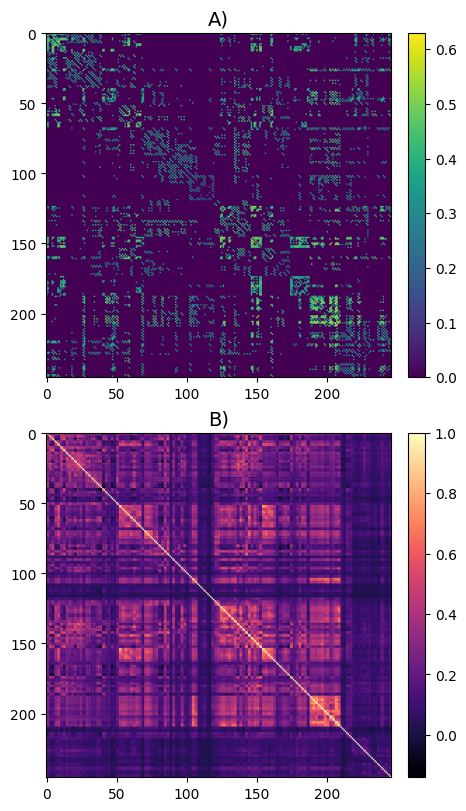

In [35]:
average_sc = np.load("output/averaged_patient_results.npz")["sc_average"]
average_fc = np.load("output/averaged_patient_results.npz")["fc_average"]

fig, ax = plt.subplots(2, 1, figsize=(5, 8), layout="compressed")

im0 = ax[0].imshow(average_sc, cmap="viridis")
ax[0].set_title("A)", fontsize=14)
fig.colorbar(im0, ax=ax[0])

im1 = ax[1].imshow(average_fc, cmap="magma")
ax[1].set_title("B)", fontsize=14)
fig.colorbar(im1, ax=ax[1])


plt.savefig("figures/averaged_sc_fc.png")

1 -0.162850748486609
5 -0.14783328823125508
25 -0.13245749020874356


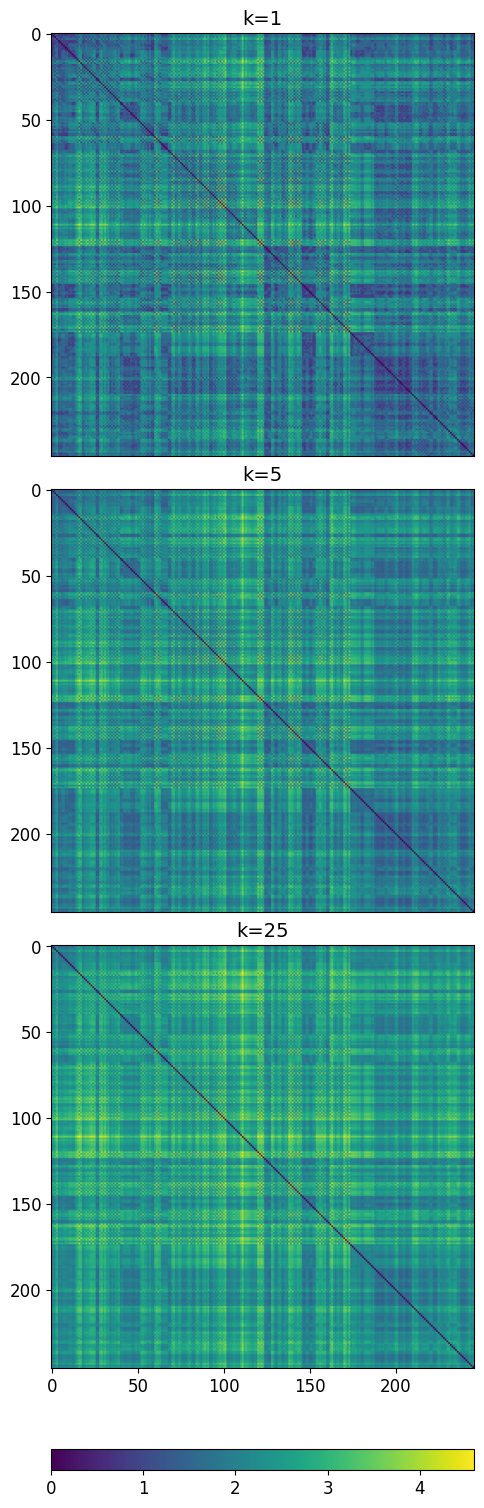

In [36]:
k_array_avg = np.load("output/averaged_patient_results.npz")["k_distance_average"]

average_fc = np.load("output/averaged_patient_results.npz")["fc_average"]
fc_triu = average_fc[np.triu_indices(average_fc.shape[0], k=1)]


fig, ax = plt.subplots(3, 1, figsize=(5, 15), layout="compressed")

# Find global vmin/vmax across all three k values
vmin = min(k_array_avg[:, :, k].min() for k in [0, 4, 24])
vmax = max(k_array_avg[:, :, k].max() for k in [0, 4, 24])

for i, k in enumerate([0, 4, 24]):
    im = ax[i].imshow(k_array_avg[:, :, k], cmap="viridis", vmin=vmin, vmax=vmax)
    ax[i].set_title(f"k={k + 1}", fontsize=14)
    ax[i].tick_params(axis="both", labelsize=12)

    # Remove x-axis for top and middle plots
    if i < 2:
        ax[i].set_xticks([])

    k_triu = k_array_avg[:, :, k][np.triu_indices(k_array_avg[:, :, k].shape[0], k=1)]

    pearson = sp.stats.pearsonr(k_triu, fc_triu)[0]
    print(k + 1, pearson)

# Add horizontal colorbar at the bottom
cbar = fig.colorbar(im, ax=ax, orientation="horizontal", fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=12)

plt.savefig("figures/averaged_k_dist_matrices.png")

In [37]:
k_distance_array = k_array_avg

k_results = []
for k_idx in [0, 4, 24]:
    adj_mat = 1 / k_distance_array[:, :, k_idx]
    adj_mat[np.isnan(adj_mat)] = 0

    dist_mat = k_distance_array[:, :, k_idx]
    dist_mat[np.isnan(dist_mat)] = 0  # with kdist isnan

    phases = run_kuramoto(
        C=adj_mat,
        distance_matrix=dist_mat,
        dt=0.0001,
        total_time=5,
        coupling_factor=0.2098 * 18,
        noise_factor=1,
        mean_delay=11e-3,
    )

    simulated_ts = np.sin(phases[:, 5000:])  # ignore initial 500ms
    simulated_fc = np.corrcoef(simulated_ts)

    sim_triu = simulated_fc[np.triu_indices(simulated_fc.shape[0], k=1)]

    pearson = sp.stats.pearsonr(sim_triu, fc_triu)[0]

    print(k_idx + 1, pearson)
    k_results.append(simulated_fc)

/tmp/ipykernel_39802/4201843424.py:5: RuntimeWarning: divide by zero encountered in divide
  adj_mat = 1 / k_distance_array[:, :, k_idx]


1 0.04575013256047677
5 0.05987117742048583
25 0.0963830490961995


In [38]:
# stack plot like before
fig, ax = plt.subplots(3, 1, figsize=(5, 15), layout="compressed")

# Find global vmin/vmax across all three k values
vmin = min(k_results[i].min() for i in range(3))
vmax = max(k_results[i].max() for i in range(3))

for i, k in enumerate([0, 4, 24]):
    im = ax[i].imshow(k_results[i], cmap="magma", vmin=vmin, vmax=vmax)
    ax[i].set_title(f"k={k + 1}", fontsize=14)
    ax[i].tick_params(axis="both", labelsize=12)

    # Remove x-axis for top and middle plots
    if i < 2:
        ax[i].set_xticks([])

# Add horizontal colorbar at the bottom
cbar = fig.colorbar(im, ax=ax, orientation="horizontal", fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=12)

plt.savefig("figures/averaged_simulated_fc_matrices.png")

In [12]:
# Collect patient IDs from simulation outputs
patient_numbers = [
    f.split(".")[0]
    for f in os.listdir("output/simulation_results/")
    if f.endswith(".npy")
]

# Use the same k values as before
k_array = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 24, 34, 49]) + 1

# Load correlations and build a long-form DataFrame for seaborn
result_array = np.zeros((len(patient_numbers), len(k_array)))
for i, patient_number in enumerate(patient_numbers):
    result_array[i, :] = np.load(f"output/simulation_results/{patient_number}.npy")[
        :,
        1,
    ]

long_df = pd.DataFrame(
    {
        "k": np.tile(k_array, len(patient_numbers)),
        "corr": result_array.ravel(),
    },
)

# Seaborn mean ± SD with navy mean and gray error bars
plt.figure(figsize=(8, 4), dpi=300)
sns.set_context("paper")
sns.lineplot(
    data=long_df,
    x="k",
    y="corr",
    estimator="mean",
    errorbar="sd",
    err_style="bars",
    color="indigo",
    err_kws={"ecolor": "silver", "capsize": 3, "linewidth": 1.2, "zorder": 1},
    zorder=2,  # Line appears on top
)
plt.scatter(k_array, np.mean(result_array, axis=0), color="indigo")


plt.xlabel("k")
plt.ylabel("Correlation")
plt.xlim(k_array.min() - 1, k_array.max() + 1)
plt.xticks(k_array)  # show the exact k values used
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.2f}"))

plt.savefig("figures/simulation_correlation_vs_k.png")

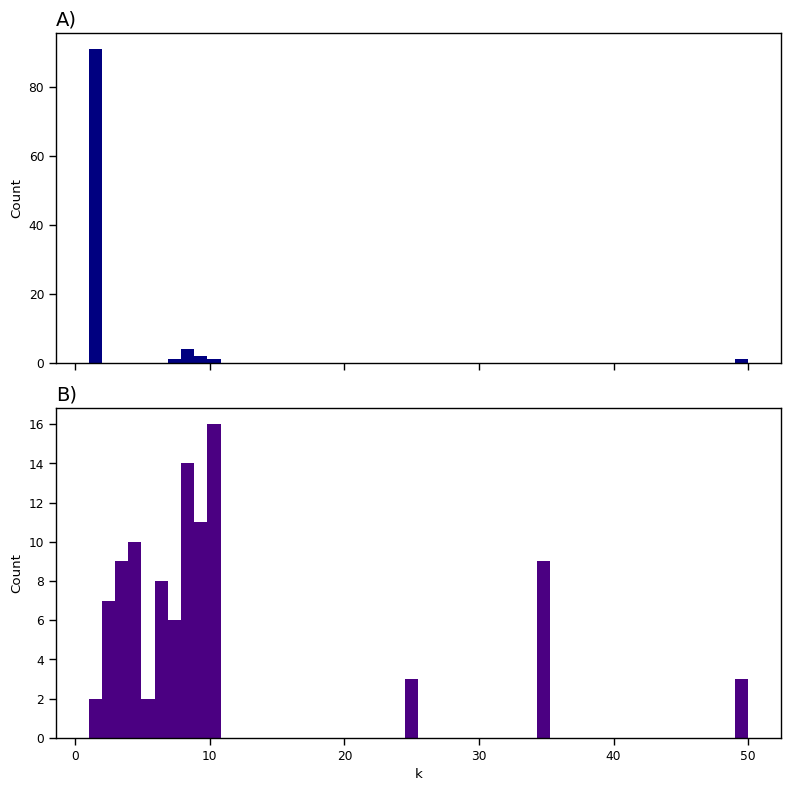

In [13]:
corr_array = np.load("output/k_dist_corr_array.npy")

# Get unique k values and their counts
best_kdist_corrs = np.argmin(corr_array, axis=1)
# Convert indices to actual k values (1-50)
kdist_k_values = best_kdist_corrs + 1
kdist_unique_k, kdist_counts = np.unique(kdist_k_values, return_counts=True)

best_sim_corrs = np.argmax(result_array, axis=1)
# Map indices to k_array values
sim_k_values = k_array[best_sim_corrs]
sim_unique_k, sim_counts = np.unique(sim_k_values, return_counts=True)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

ax1.hist(kdist_k_values, bins=50, color="navy")
ax1.set_title("A)", fontsize=14, loc="left")
ax1.set_ylabel("Count")

ax2.hist(sim_k_values, bins=50, color="indigo")
ax2.set_title("B)", fontsize=14, loc="left")
ax2.set_ylabel("Count")
ax2.set_xlabel("k")

plt.tight_layout()

plt.savefig("figures/best_k_histograms.png")

In [ ]:
# Load arrays
sweep = np.load("output/second_sweep_results.npz")["pearson_array"]
k_values = np.load("output/second_sweep_results.npz")["k_values"]
coupling_factors = np.load("output/second_sweep_results.npz")["coupling_factors"]
noise_factors = np.load("output/second_sweep_results.npz")["noise_factors"]

use_abs = True
arr = np.abs(sweep) if use_abs else sweep

# Meshgrids
k_vals, c_vals, n_vals = np.meshgrid(
    k_values,
    coupling_factors,
    noise_factors,
    indexing="ij",
)

# Flatten for 3D scatter
k_flat = k_vals.flatten()
c_flat = c_vals.flatten()
n_flat = n_vals.flatten()
corr_flat = arr.flatten()

fig = plt.figure(figsize=(20, 6))

# 3D scatter
ax1 = fig.add_subplot(141, projection="3d")
sc = ax1.scatter(
    c_flat,
    n_flat,
    corr_flat,
    c=k_flat,
    cmap="plasma",
    s=50,
    alpha=0.7,
    edgecolor="k",
    linewidth=0.3,
)
ax1.set_xlabel("Coupling")
ax1.set_ylabel("Noise")
ax1.set_zlabel("Pearson")
ax1.set_title("3D sweep (color=k)")
cbar = fig.colorbar(sc, ax=ax1, pad=0.1, shrink=0.7)
cbar.set_label("k value")

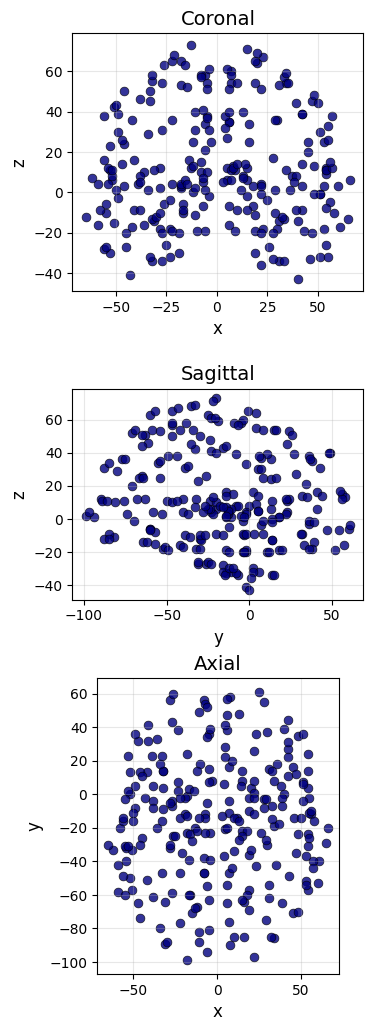

In [34]:
import matplotlib.pyplot as plt
import numpy as np

atlas_file = pd.ExcelFile("NetworkModelling/data/bna_atlas.xlsx")
atlas = atlas_file.parse(sheet_name="Sheet1", header=1).to_numpy()

atlasx = atlas[2:, 2].astype(float)
atlasy = atlas[2:, 3].astype(float)
atlasz = atlas[2:, 4].astype(float)

centroids = np.array([[atlasx[i], atlasy[i], atlasz[i]] for i in range(len(atlasx))])

fig, axes = plt.subplots(3, 1, figsize=(4, 12), layout="compressed")

views = [
    (0, 2, "Coronal", "x", "z"),
    (1, 2, "Sagittal", "y", "z"),
    (0, 1, "Axial", "x", "y"),
]

for ax, (i, j, title, xlabel, ylabel) in zip(axes, views):
    ax.scatter(
        centroids[:, i],
        centroids[:, j],
        c="navy",
        s=40,
        alpha=0.8,
        edgecolors="black",
        linewidth=0.5,
    )
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_aspect("equal")
    ax.grid(True, alpha=0.3)

# plt.subplots_adjust(hspace=3)
plt.savefig("figures/brain_atlas_views.png")

In [ ]:
# Plots for method overview

patient_number = "118730"
patient_ts_file = pd.ExcelFile(f"NetworkModelling/data/fMRI/{patient_number}.xlsx")
patient_ts = patient_ts_file.parse(sheet_name="Sheet1", header=None).to_numpy().T

patient_sc_file = pd.ExcelFile(f"NetworkModelling/data/DTI/{patient_number}.xlsx")
patient_sc = patient_sc_file.parse(sheet_name="Sheet1", header=None).to_numpy()

patient_fc = np.corrcoef(patient_ts)

k_distance_array = np.load(f"output/k_shortest_paths/{patient_number}.npz")[
    "k_distance_array"
]

k_results = []
for k_idx in [9]:
    adj_mat = 1 / k_distance_array[:, :, k_idx]
    adj_mat[np.isnan(adj_mat)] = 0

    dist_mat = k_distance_array[:, :, k_idx]
    dist_mat[np.isnan(dist_mat)] = 0  # with kdist isnan

    phases = run_kuramoto(
        C=adj_mat,
        distance_matrix=dist_mat,
        dt=0.0001,
        total_time=3,
        coupling_factor=0.2098 * 18,
        noise_factor=1,
        mean_delay=11e-3,
    )

    simulated_ts = np.sin(phases[:, 5000:])  # ignore initial 500ms
    simulated_fc = np.corrcoef(simulated_ts)

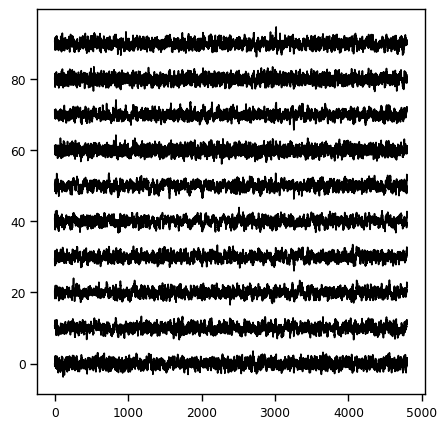

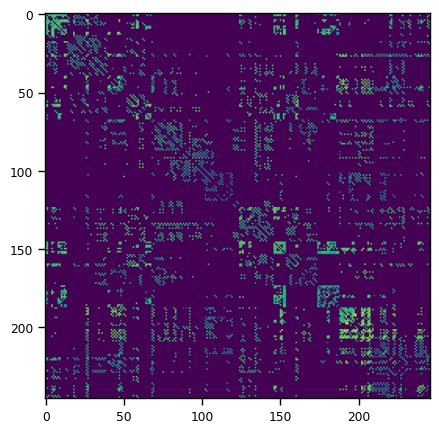

In [30]:
plt.figure(figsize=(5, 5))
cmap = plt.get_cmap("cividis")
for i in range(10):
    plt.plot(patient_ts[i] + i * 10, color="black")
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(patient_sc)
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(patient_fc, cmap="magma")
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(k_distance_array[:, :, 9])
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(simulated_fc, cmap="magma")
plt.show()